###Get the data

We'e using image data. Specifically, using pizza and steak, which will be passed thorugh a binary classifier.

In [ ]:
import zipfile

#Download zip file of pizza_steak image from Food-101 dataset
#https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()



--2022-01-09 19:15:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 173.194.74.128, 209.85.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   194MB/s    in 0.5s    

2022-01-09 19:15:58 (194 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



###Inspect the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/test

pizza  steak


In [ ]:
!ls pizza_steak/test/steak

100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056.jpg
1206166.jpg  1874088

In [ ]:
import os

#walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
   print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)


['pizza' 'steak']


In [ ]:
#View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Set up target directory
  target_folder = target_dir + target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #Read in the image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("on")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


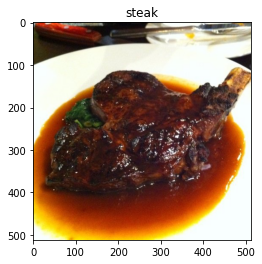

In [ ]:
#View a random image form the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
img

array([[[103, 139, 137],
        [112, 144, 139],
        [113, 139, 130],
        ...,
        [111, 104,  94],
        [117, 110, 102],
        [148, 139, 132]],

       [[144, 175, 177],
        [145, 174, 172],
        [139, 158, 154],
        ...,
        [106, 102,  93],
        [110, 103,  95],
        [133, 126, 118]],

       [[172, 199, 206],
        [172, 193, 198],
        [158, 170, 170],
        ...,
        [109, 106,  99],
        [107, 104,  97],
        [119, 116, 109]],

       ...,

       [[249, 255, 255],
        [249, 255, 255],
        [249, 255, 255],
        ...,
        [249, 255, 255],
        [249, 255, 255],
        [249, 255, 255]],

       [[249, 255, 255],
        [249, 255, 255],
        [249, 255, 255],
        ...,
        [249, 255, 255],
        [249, 255, 255],
        [249, 255, 255]],

       [[249, 255, 255],
        [249, 255, 255],
        [249, 255, 255],
        ...,
        [249, 255, 255],
        [249, 255, 255],
        [249, 255, 255]]

In [ ]:
#View the image shape
img.shape
#(Width, Hight, Colour Channels). <-- in this case colour channels = 3 for RGB

(512, 512, 3)

In [ ]:
#Normalizing data, since models like values between 0 and 1
#Max value for any RGB values will be 255, so we divide by that
img/255.0

array([[[0.40392157, 0.54509804, 0.5372549 ],
        [0.43921569, 0.56470588, 0.54509804],
        [0.44313725, 0.54509804, 0.50980392],
        ...,
        [0.43529412, 0.40784314, 0.36862745],
        [0.45882353, 0.43137255, 0.4       ],
        [0.58039216, 0.54509804, 0.51764706]],

       [[0.56470588, 0.68627451, 0.69411765],
        [0.56862745, 0.68235294, 0.6745098 ],
        [0.54509804, 0.61960784, 0.60392157],
        ...,
        [0.41568627, 0.4       , 0.36470588],
        [0.43137255, 0.40392157, 0.37254902],
        [0.52156863, 0.49411765, 0.4627451 ]],

       [[0.6745098 , 0.78039216, 0.80784314],
        [0.6745098 , 0.75686275, 0.77647059],
        [0.61960784, 0.66666667, 0.66666667],
        ...,
        [0.42745098, 0.41568627, 0.38823529],
        [0.41960784, 0.40784314, 0.38039216],
        [0.46666667, 0.45490196, 0.42745098]],

       ...,

       [[0.97647059, 1.        , 1.        ],
        [0.97647059, 1.        , 1.        ],
        [0.97647059, 1

In [ ]:
#View the image shape
img.shape

(512, 512, 3)

##Preprocessing

In [ ]:
#Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

##Batches
Our next step is to turn our data into batches.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

10,000 images (or more) might not fit into the memory of your processor (GPU).
Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.
Why 32?

A batch size of 32 is good for your health.

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.



In [ ]:
#Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#1/255. means scaling all values down by 255
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
#We creates batches and also resize the photos to 224x224
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               batch_size = 32)

test_data = train_datagen.flow_from_directory(directory = test_dir,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Some things to here:

* Due to how our directories are structured, the classes get inferred by the subdirectory names in `train_dir` and `test_dir`.
* The `target_size` parameter defines the input size of our images in (height, width) format.
* The `class_mode` value of 'binary' defines our classification problem type. If we had more than two classes, we would use 'categorical'.
* The `batch_size` defines how many images will be in each batch, we've used 32 which is the same as the default.

In [ ]:
#Get a sample of the training data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

(224, 224, 3)

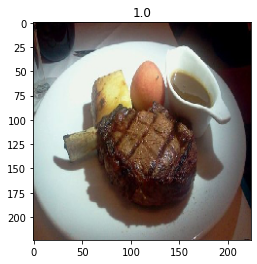

In [ ]:
#Plot an image
plt.imshow(images[2])
plt.title(labels[2])
plt.axis("on")
images[2].shape

In [ ]:
#View the first batch or labels
labels

array([0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.],
      dtype=float32)

In [ ]:
#Create a model (start with a baseline)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
#Create the model (this is our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = 'valid',
           activation = 'relu',
           input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid')                  
])

And it follows the typical CNN structure of:

```
Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output
```

Let's discuss some of the components of the `Conv2D` layer:

* The "`2D`" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* `filters` - these are the number of "feature extractors" that will be moving over our images.
* `kernel_size` - the size of our filters, for example, a `kernel_size` of `(3, 3)` (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
* `stride` - the number of pixels a `filter` will move across as it covers the image. A `stride` of 1 means the filter moves across each pixel 1 by 1. A `stride` of 2 means it moves 2 pixels at a time.
* `padding` - this can be either `'same'` or `'valid'`, `'same'` adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as `'valid'` will only scan through the pixels in the image using the filter.
https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t

What's a "feature"?

A **feature** can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these **features** are not defined by us, instead, the model learns them as it applies different filters across the image.

In [ ]:
#Compile the model
model_4.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

### 4. Fit a model

Our model is compiled, time to fit it.

You'll notice two new parameters here:
* `steps_per_epoch` - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of `train_data` (1500 images in batches of 32 = 1500/32 = ~47 steps)
* `validation_steps` - same as above, except for the `validation_data` parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [ ]:
#Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 117s 2s/step - loss: 0.6133 - accuracy: 0.6933 - val_loss: 0.4093 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 115s 2s/step - loss: 0.4108 - accuracy: 0.8260 - val_loss: 0.3757 - val_accuracy: 0.8800
Epoch 3/5
47/47 [==============================] - 114s 2s/step - loss: 0.3126 - accuracy: 0.8827 - val_loss: 0.3183 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 128s 3s/step - loss: 0.2650 - accuracy: 0.9060 - val_loss: 0.3316 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 114s 2s/step - loss: 0.1253 - accuracy: 0.9667 - val_loss: 0.3496 - val_accuracy: 0.8540


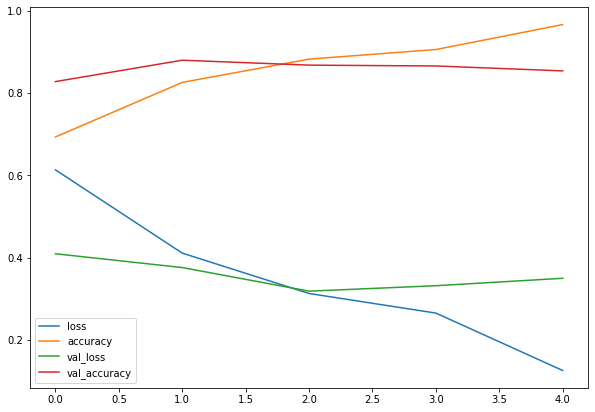

In [ ]:
#Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10,7))

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

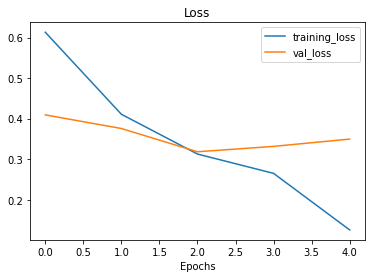

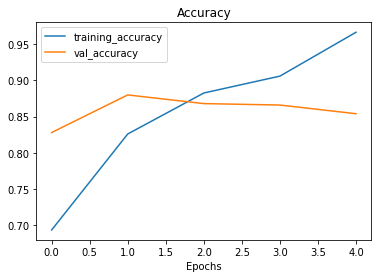

In [ ]:
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model  comes in 3 steps:
0. Create a basline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

And there are even a few more things we could try to further overfit our model:
* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.


So how do we stop overfitting?
So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.
Namely, we'll build 2 more models:
* A ConvNet with [max pooling](https://deeplizard.com/learn/video/ZjM_XQa5s6s)
* A ConvNet with max pooling and data augmentation

In [ ]:
#Same as model_4, but with a maxpool layer after each layer
model_5 = Sequential([
     Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
     MaxPool2D(pool_size = 2), #reduce number of features by half
     Conv2D(10, 3, activation = 'relu'),
     MaxPool2D(),
     Conv2D(10, 3, activation = 'relu'),
     Flatten(),
     Dense(1, activation = 'sigmoid')
])

If convolutional layers learn the features of an image, the max pooling is figuring out the most important of those features.

In [ ]:
#Compile model
model_5.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [ ]:
#Fit the model
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 50s 1s/step - loss: 0.6057 - accuracy: 0.6753 - val_loss: 0.4553 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 50s 1s/step - loss: 0.4279 - accuracy: 0.8133 - val_loss: 0.3639 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 50s 1s/step - loss: 0.3958 - accuracy: 0.8213 - val_loss: 0.3373 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 50s 1s/step - loss: 0.3399 - accuracy: 0.8600 - val_loss: 0.3109 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 51s 1s/step - loss: 0.3021 - accuracy: 0.8800 - val_loss: 0.3302 - val_accuracy: 0.8560


Pooling's supposed to make a bit better on validation data, however, it seems that our previous model was not as overfit as we thought

In [ ]:
# Check out the model architecture
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 flatten_1 (Flatten)         (None, 27040)            

We see that each MaxPooling layer is reducing the image dimensions by half

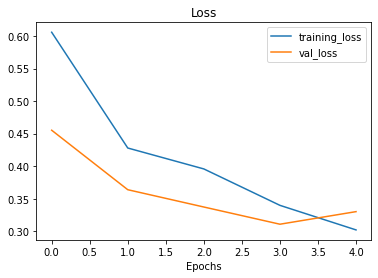

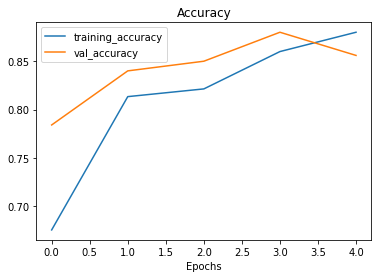

In [ ]:
plot_loss_curves(history_5)

Although performance actually decreased a bit, we see that training and validation accuracy is a lot closer meaning our data is more generalizable than previously

Essentially overfitting means that the model is good at predicting the sample, but does not have good generalization properties. Lets use techniques to make the model more generalizable.

One of these techniques is data augmentation. We will introduce more variety and diversity. We can do this by using the ImageDataGenerator again.

The ImageDataGenerator is a class which allows you to encode augmentations, and with a flow_from_directory gernerator function which takes in a directory of images and organizes them in various ways (reshapes, batches, etc.)

In [ ]:
#Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 20, #rotation the image slightly between 0 and 20 degrees, must be int
                                             shear_range = 0.2, #Shear the image
                                             zoom_range = 0.2, #zoom into the image
                                             width_shift_range = 0.2, #Shift the image width ways
                                             height_shift_range= 0.2, #Shift the image height ways
                                             horizontal_flip = True)

#Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

#Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.) 


In [ ]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size = (224, 224),
                                                                      batch_size = 32,
                                                                      class_mode = 'binary',
                                                                      shuffle = False) #Don't shuffle, for demonstration purposes
#Create non-augmented data batches                                                                      
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'binary',
                                               shuffle = False) #Don't shuffle, for demonstration purposes
print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = 'binary') #Don't shuffle, for demonstration purposes
                                                                

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() #Note: labels aren't augmented

(-0.5, 223.5, 223.5, -0.5)

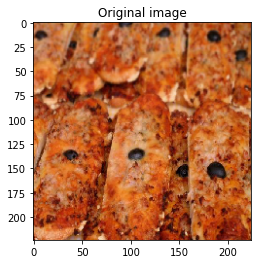

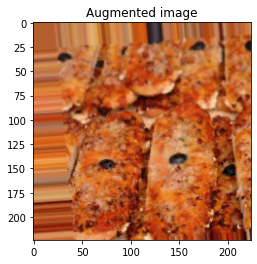

In [ ]:
#Show original image and augmented image
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(True)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(True)

Note: There is such thing as over-Data augmentation. However, the amount of data augmentation is more based on intuition.

In [ ]:
#Now turn shuffle on
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size = (224, 224),
                                                                      batch_size = 32,
                                                                      class_mode = 'binary',
                                                                      shuffle = True) 
print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = 'binary')
                                                                

Augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
#Create the model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')                  
])

#Compile the model
model_6.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

#Fit the model
history_6 = model_6.fit(train_data_augmented, 
            #since train_data_augmented outputs a BATCH (in this case 32) of images and labels, 
            #we do not need to write them in seperately
            epochs = 5,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data))
 

Epoch 1/5
47/47 [==============================] - 27s 554ms/step - loss: 0.6636 - accuracy: 0.5980 - val_loss: 0.5221 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 25s 535ms/step - loss: 0.5387 - accuracy: 0.7507 - val_loss: 0.4144 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 25s 535ms/step - loss: 0.5284 - accuracy: 0.7520 - val_loss: 0.4107 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 25s 539ms/step - loss: 0.5125 - accuracy: 0.7547 - val_loss: 0.3881 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 25s 534ms/step - loss: 0.4980 - accuracy: 0.7780 - val_loss: 0.3935 - val_accuracy: 0.8440


We see that training time is longer, because of data augmentation

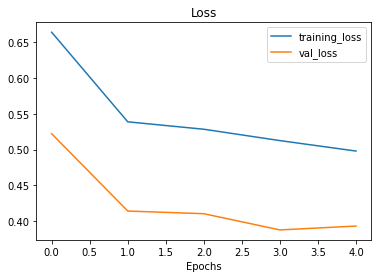

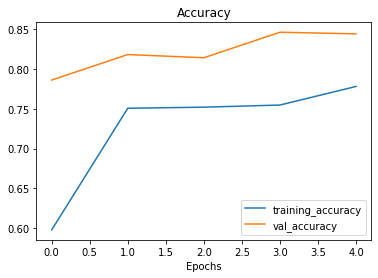

In [ ]:
plot_loss_curves(history_6)

In [ ]:
#This model is about as good as the TinyVGG 
#Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(), 
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 571ms/step - loss: 0.6334 - accuracy: 0.6413 - val_loss: 0.4785 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 26s 558ms/step - loss: 0.5526 - accuracy: 0.7320 - val_loss: 0.4072 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 26s 560ms/step - loss: 0.5171 - accuracy: 0.7507 - val_loss: 0.3704 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 26s 554ms/step - loss: 0.4882 - accuracy: 0.7720 - val_loss: 0.3850 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 26s 555ms/step - loss: 0.4915 - accuracy: 0.7707 - val_loss: 0.3651 - val_accuracy: 0.8460


###Making a prediction with our trained model

We will upload our own image and see how it's prediciton is

In [ ]:
import tensorflow as tf

In [ ]:
#Remind ourselves of the classes
print(class_names)

['pizza' 'steak']


--2022-01-09 20:59:19--  https://upload.wikimedia.org/wikipedia/commons/9/9a/Reel_and_Brand_-_September_2021_-_Sarah_Stierch_05.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3940098 (3.8M) [image/jpeg]
Saving to: ‘Reel_and_Brand_-_September_2021_-_Sarah_Stierch_05.jpg’

Reel_and_Brand_-_Se 100%[===================>]   3.76M  15.9MB/s    in 0.2s    

2022-01-09 20:59:19 (15.9 MB/s) - ‘Reel_and_Brand_-_September_2021_-_Sarah_Stierch_05.jpg’ saved [3940098/3940098]



(-0.5, 2722.5, 2041.5, -0.5)

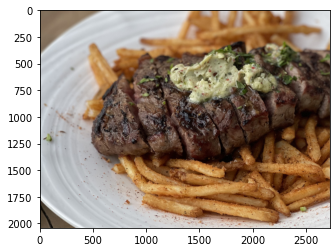

In [ ]:
#View our example image
!wget https://upload.wikimedia.org/wikipedia/commons/9/9a/Reel_and_Brand_-_September_2021_-_Sarah_Stierch_05.jpg
steak = mpimg.imread("Reel_and_Brand_-_September_2021_-_Sarah_Stierch_05.jpg")
plt.imshow(steak)
plt.axis(True)

In [ ]:
#Check shape
steak.shape

(2042, 2723, 3)

We need to reshape our image using tf.io.read_file and tf.image (for resizing the image and turning it into a tensor)

In [ ]:
#Write a function to import an image and resize it to be able to be used
def load_and_prep_image(filename, img_shape):
  #Read in taget file
  img = tf.io.read_file(filename)

  #Decode the read file into a tensor & ensure 3 colour channels
  #Our model is trained on images with 3 colour channels and sometimes images have 4 
  img = tf.image.decode_image(img, channels = 3)

  #Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  #Rescale the image
  img = tf.image.resize(img, size = [img_shape, img_shape])

  #Rescale the image (get all values between 0 and 1)
  img = img/225.
  return img

In [ ]:
#Load in and preprocess our custom image
steak = load_and_prep_image("Reel_and_Brand_-_September_2021_-_Sarah_Stierch_05.jpg", 224)
steak.shape

TensorShape([224, 224, 3])

In [ ]:
#Unfortunately we cannot predict yet, because we trained the model in batches
model_8.predict(steak)

ValueError: ignored

Although our image is in the same shape as the images our model has been trained on, we're still missing a dimension.

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of `(batch_size, 224, 224, 3)`.

We can fix this by adding an extra to our custom image tensor using [`tf.expand_dims`](https://www.tensorflow.org/api_docs/python/tf/expand_dims).

In [ ]:
#Add an extra axis 
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis = 0)
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.55772877, 0.47772878, 0.3888399 ],
         [0.57196337, 0.49196336, 0.40307447],
         [0.56558996, 0.48558998, 0.3967011 ],
         ...,
         [0.98293656, 1.0007143 , 1.0140476 ],
         [0.9792162 , 0.996994  , 1.0103273 ],
         [0.9881346 , 1.0084819 , 1.0180652 ]],

        [[0.56701386, 0.48701388, 0.398125  ],
         [0.57487667, 0.4948766 , 0.4059877 ],
         [0.5737348 , 0.4937348 , 0.40484592],
         ...,
         [0.98230684, 1.0000846 , 1.013418  ],
         [0.9911111 , 1.0088888 , 1.0222223 ],
         [0.9799793 , 1.0003265 , 1.0099097 ]],

        [[0.57590276, 0.49590278, 0.4070139 ],
         [0.5748122 , 0.4948121 , 0.40592322],
         [0.574623  , 0.494623  , 0.40573412],
         ...,
         [0.98070216, 0.99847996, 1.0118133 ],
         [0.9878472 , 1.005625  , 1.0189583 ],
         [0.9927846 , 1.0131319 , 1.0227152 ]],

        ...,

        [[0.35849914, 0.30072138, 

In [ ]:
#Now we can predict
pred = model_8.predict(steak)
pred

array([[0.96041584]], dtype=float32)

Nice, it predicts it as a 96% probability of being a steak

In [ ]:
#We will round it to one or the other
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [ ]:
#Lets make a function that does this
def pred_and_plot(model, filename, img_shape, class_names):
  #Import the target image
  img = load_and_prep_image(filename, img_shape)

  #Make prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[int(tf.round(pred)[0][0])]

  #Plot the image and predited class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


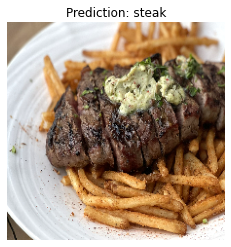

In [ ]:
pred_and_plot(model_8, "Reel_and_Brand_-_September_2021_-_Sarah_Stierch_05.jpg", 224, class_names)

###Lets try to do this with multiclass classification

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-01-09 21:25:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.194.128, 173.194.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  79.0MB/s    in 6.0s    

2022-01-09 21:25:37 (82.6 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
!ls 10_food_classes_all_data/

test  train


In [ ]:
!ls 10_food_classes_all_data/test

chicken_curry  fried_rice      hamburger  pizza  steak
chicken_wings  grilled_salmon  ice_cream  ramen  sushi


In [ ]:
#Walk through 10_food_classes_all_data directory
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

Image shape: (512, 512, 3)


array([[[ 64,  63,  61],
        [ 59,  58,  56],
        [ 55,  51,  50],
        ...,
        [ 30,  32,  21],
        [ 34,  36,  25],
        [ 39,  41,  30]],

       [[ 54,  53,  51],
        [ 52,  48,  47],
        [ 48,  44,  43],
        ...,
        [ 29,  31,  20],
        [ 32,  34,  23],
        [ 36,  38,  27]],

       [[ 56,  52,  51],
        [ 53,  49,  48],
        [ 50,  46,  45],
        ...,
        [ 24,  26,  15],
        [ 27,  29,  18],
        [ 30,  32,  21]],

       ...,

       [[ 18,  18,   8],
        [ 14,  14,   4],
        [ 13,  13,   3],
        ...,
        [167, 184, 176],
        [165, 185, 176],
        [165, 185, 174]],

       [[ 16,  16,   8],
        [ 13,  13,   5],
        [ 13,  13,   3],
        ...,
        [164, 181, 171],
        [163, 183, 172],
        [164, 184, 173]],

       [[ 11,  11,   3],
        [ 10,  10,   2],
        [ 11,  11,   3],
        ...,
        [158, 178, 167],
        [161, 181, 170],
        [164, 184, 173]]

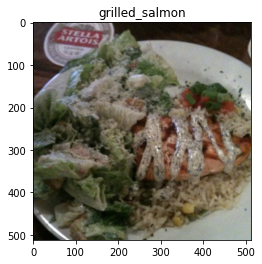

In [ ]:
#lets view the images first
view_random_image("10_food_classes_all_data/train/", "grilled_salmon")

In [ ]:
#For convenience lets set up the train and test directories as variabels
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
#Make a list of all the categories
import os
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
#Now we will batch it and augment it
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                   rotation_range = 20,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
#Augment it and batch it
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (300,300),
                                               batch_size = 32,
                                               class_mode = 'categorical',
                                               shuffle = True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (300,300),
                                             batch_size = 32,
                                             class_mode = 'categorical',
                                             shuffle = True)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
#Now that preproccessing is done, we can start to create a model
cat_model = Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (300, 300, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax') #Rememeber 10 neurons because we have 10 categories            
])

In [ ]:
cat_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 298, 298, 10)      280       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 149, 149, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 147, 147, 10)      910       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 73, 73, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 71, 71, 10)        910       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 35, 35, 10)     

In [ ]:
#Compile model
cat_model.compile(loss = 'categorical_crossentropy',
                  optimizer = Adam(),
                  metrics = ['accuracy'])

In [ ]:
images, labels = test_data.next()
images.shape, labels.shape

((32, 300, 300, 3), (32, 10))

In [ ]:
images, labels = train_data.next()
images.shape, labels.shape

((32, 300, 300, 3), (32, 10))

In [ ]:
#Fit the model
cat_history = cat_model.fit(train_data,
                            epochs = 5,
                            steps_per_epoch = len(train_data),
                            validation_data = test_data,
                            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 192s 812ms/step - loss: 2.2869 - accuracy: 0.1259 - val_loss: 2.2243 - val_accuracy: 0.1592
Epoch 2/5
235/235 [==============================] - 189s 804ms/step - loss: 2.2206 - accuracy: 0.1815 - val_loss: 2.1354 - val_accuracy: 0.2104
Epoch 3/5
235/235 [==============================] - 187s 794ms/step - loss: 2.0897 - accuracy: 0.2568 - val_loss: 2.0084 - val_accuracy: 0.2876
Epoch 4/5
235/235 [==============================] - 188s 798ms/step - loss: 2.0453 - accuracy: 0.2781 - val_loss: 1.9755 - val_accuracy: 0.3036
Epoch 5/5
235/235 [==============================] - 190s 808ms/step - loss: 2.0262 - accuracy: 0.2856 - val_loss: 1.9043 - val_accuracy: 0.3356


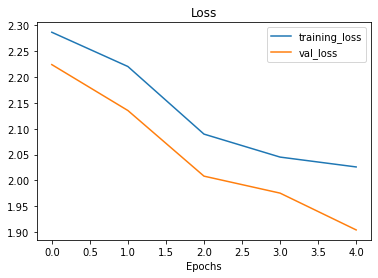

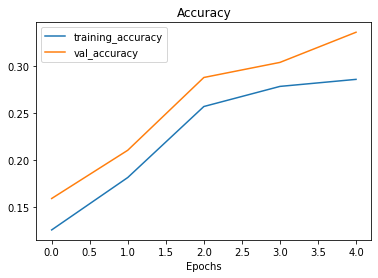

In [ ]:
#Plot loss curves
plot_loss_curves(cat_history)

Nice, it seems that although we used many layers, we havent overfit the model.

Lets try to predict some images

In [ ]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


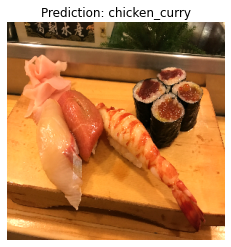

In [ ]:
#Make a prediction using cat_model
pred_and_plot(model = cat_model,
              filename = "03-sushi.jpeg",
              class_names = class_names,
              img_shape = 300)

In [ ]:
img = load_and_prep_image("03-sushi.jpeg", 300)
cat_model.predict(tf.expand_dims(img, axis = 0))

array([[0.31880435, 0.29776168, 0.03181734, 0.07869743, 0.04536287,
        0.00521983, 0.10128311, 0.03363175, 0.03456625, 0.05285539]],
      dtype=float32)

Giving everything as chicken curry, must be something wrong

In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names, img_shape):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename, img_shape)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


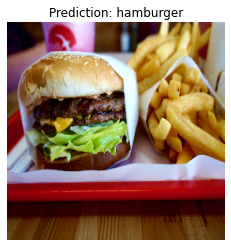

In [ ]:
pred_and_plot(model = cat_model,
              filename = "03-hamburger.jpeg",
              class_names = class_names,
              img_shape = 300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


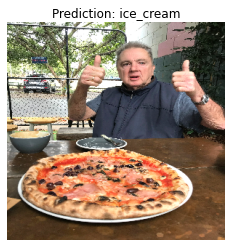

In [ ]:
pred_and_plot(model = cat_model,
              filename = "03-pizza-dad.jpeg",
              class_names = class_names,
              img_shape = 300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


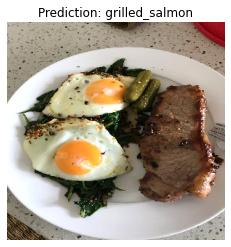

In [ ]:
pred_and_plot(model = cat_model,
              filename = "03-steak.jpeg",
              class_names = class_names,
              img_shape = 300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


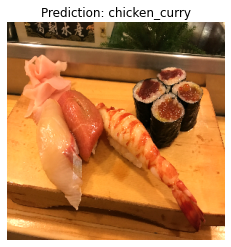

In [ ]:
pred_and_plot(model = cat_model,
              filename = "03-sushi.jpeg",
              class_names = class_names,
              img_shape = 300)

Our model isn't very good, it is ponly performing at around 33% accuracy

In [ ]:
#However, lets save our model for later
cat_model.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [ ]:
#Load in a model and evaluate it
loaded_cat_model = tf.keras.models.load_model("saved_trained_model")
loaded_cat_model.evaluate(test_data)

79/79 [==============================] - 15s 182ms/step - loss: 1.9043 - accuracy: 0.3356


[1.9042834043502808, 0.33559998869895935]

In [ ]:
cat_model.evaluate(test_data)

79/79 [==============================] - 15s 191ms/step - loss: 1.9043 - accuracy: 0.3356


[1.9042834043502808, 0.33559998869895935]